**Nama : Alfendo Rizky Syachputra**

**Kode : PYTN-KS10-024**

This dataset contains the location, address, type, sale price, and sale date of building units sold. A reference on the trickier fields:

BOROUGH: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).

BLOCK; LOT: The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL.

BUILDING CLASS AT PRESENT and BUILDING CLASS AT TIME OF SALE: The type of building at various points in time. See the glossary linked to below.

## Assigment 2

In [326]:
# import library
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd

In [327]:
# memanggil dataset
ds = pd.read_csv('nyc-rolling-sales.csv')
ds.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [328]:
# informasi type setiap kolom pada dataset
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [332]:
ds.dtypes

BOROUGH                             int64
NEIGHBORHOOD                       object
BUILDING CLASS CATEGORY            object
TAX CLASS AT PRESENT               object
BLOCK                               int64
LOT                                 int64
BUILDING CLASS AT PRESENT          object
ADDRESS                            object
ZIP CODE                            int64
RESIDENTIAL UNITS                   int64
COMMERCIAL UNITS                    int64
TOTAL UNITS                         int64
LAND SQUARE FEET                  float64
GROSS SQUARE FEET                 float64
YEAR BUILT                          int64
TAX CLASS AT TIME OF SALE           int64
BUILDING CLASS AT TIME OF SALE     object
SALE PRICE                        float64
SALE DATE                          object
dtype: object

In [345]:
# informasi jumlah baris dan kolom
ds.shape

(84548, 19)

## Data Cleaning

In [329]:
missing_values = ['n/a', 'na', "--", "?", "NA", 'n-a', 'NaN',' ',' -  ']
ds = pd.read_csv('nyc-rolling-sales.csv', na_values=missing_values)

In [330]:
# menghapus kolom yang tidak digunakan
ds.drop(['Unnamed: 0',  'APARTMENT NUMBER', 'EASE-MENT'], axis=1, inplace=True)
ds.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,10009,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,10009,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17 00:00:00


In [333]:
# Replace SALE PRICE
ds['SALE PRICE']=ds['SALE PRICE'].replace({0:0})

In [334]:
float_column = ['SALE PRICE', 'LAND SQUARE FEET', 'GROSS SQUARE FEET']

# mengubah menjadi tipe 'float'
for col in float_column:
    ds[col] = ds[col].astype('float64')

In [335]:
ds.head(10)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,10009,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,10009,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17 00:00:00
5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405,16,C4,516 EAST 12TH STREET,10009,20,0,20,2581.0,9730.0,1900,2,C4,NaN,2017-07-20 00:00:00
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23 00:00:00
7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,407,18,C7,520 EAST 14TH STREET,10009,44,2,46,5163.0,21007.0,1900,2,C7,NaN,2017-07-20 00:00:00
8,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,379,34,D5,141 AVENUE D,10009,15,0,15,1534.0,9198.0,1920,2,D5,NaN,2017-06-20 00:00:00
9,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,10009,24,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07 00:00:00


In [339]:
# melakukan rename pada kolom borough
ds['BOROUGH'].replace({'1':'Manhattan','2':'Bronx','3':'Brooklyn','4':'Queens','5':'Staten Island'},inplace=True)

In [340]:
# mengubah type data borough menjadi str
ds['BOROUGH'] = ds['BOROUGH'].astype(str)

In [341]:
ds

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19 00:00:00
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,10009,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14 00:00:00
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,10009,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09 00:00:00
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23 00:00:00
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,10309,2,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28 00:00:00
84544,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,10309,2,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21 00:00:00
84545,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,10309,2,0,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05 00:00:00
84546,Staten Island,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,10309,0,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21 00:00:00


In [342]:
ds.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19 00:00:00
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,10009,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14 00:00:00
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,10009,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09 00:00:00
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23 00:00:00
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17 00:00:00


In [343]:
# descriptive statistics
ds.describe()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,5.829600e+04,5.693600e+04,84548.000000,84548.000000,6.998700e+04
mean,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,3.941676e+03,4.045707e+03,1789.322976,1.657485,1.276456e+06
std,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,4.198397e+04,3.503249e+04,537.344993,0.819341,1.140526e+07
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000e+00
25%,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1.650000e+03,1.046750e+03,1920.000000,1.000000,2.250000e+05
50%,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,2.325000e+03,1.680000e+03,1940.000000,2.000000,5.300000e+05
75%,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,3.500000e+03,2.560000e+03,1965.000000,2.000000,9.500000e+05
max,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2017.000000,4.000000,2.210000e+09


In [346]:
# checking missing value
ds.isna().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                738
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT           738
ADDRESS                               0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

In [347]:
# Pada kolom kategorik
category_column = ['TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT']
for cat_col in category_column:
    ds[cat_col].fillna(ds[cat_col].mode()[0], inplace=True)

In [351]:
# Mengganti nilai missing values untuk kolom numerik
float_column = ['SALE PRICE','LAND SQUARE FEET','GROSS SQUARE FEET']
for float_col in float_column:
    ds[float_col].fillna(ds[float_col].median(), inplace=True)

In [352]:
ds.isna().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

## Measure of Central Tedency

**1 . MEAN**

In [353]:
# menghapus beberapa kolom pada dataset
ds_drop = ds.drop (['NEIGHBORHOOD','BLOCK','LOT','ZIP CODE',
                    'RESIDENTIAL UNITS','COMMERCIAL UNITS',
                    'LAND SQUARE FEET','GROSS SQUARE FEET',
                    'TOTAL UNITS','YEAR BUILT','BUILDING CLASS CATEGORY',
                    'TAX CLASS AT PRESENT','BUILDING CLASS AT PRESENT',
                    'ADDRESS','TAX CLASS AT TIME OF SALE',
                    'BUILDING CLASS AT TIME OF SALE','SALE DATE'], axis=1, inplace = False)

In [354]:
# melakukan groupby berdasarkan BOROUGH
ds_mean = ds_drop.groupby(['BOROUGH'], axis=0).sum()

In [355]:
ds_mean

,SALE PRICE
BOROUGH,
Bronx,4.160275e+09
Brooklyn,2.006694e+10
Manhattan,5.024619e+10
Queens,1.804100e+10
Staten Island,4.538281e+09


In [356]:
# untuk menghitung nilai mean pada dataset
mean_ = np.mean(ds_mean)
mean_

SALE PRICE    1.941054e+10
dtype: float64

**Conclusion**

Jadi nilai rata - rata SALE PRICE berdasarkan pada kolom BOROUGH adalah  1.9

**2 . MEDIAN**

In [310]:
ds

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19 00:00:00
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,10009,28,3,31,4616.0,18690.0,1900,2,C7,530000.0,2016-12-14 00:00:00
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,10009,16,1,17,2212.0,7803.0,1900,2,C7,530000.0,2016-12-09 00:00:00
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23 00:00:00
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,10309,2,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28 00:00:00
84544,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,10309,2,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21 00:00:00
84545,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,10309,2,0,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05 00:00:00
84546,Staten Island,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,10309,0,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21 00:00:00


In [311]:
ds_median = ds.drop(['NEIGHBORHOOD','BOROUGH','BLOCK','TOTAL UNITS','ZIP CODE',
                    'RESIDENTIAL UNITS','COMMERCIAL UNITS',
                    'LAND SQUARE FEET','GROSS SQUARE FEET',
                    'SALE PRICE','BUILDING CLASS CATEGORY',
                    'TAX CLASS AT PRESENT','BUILDING CLASS AT PRESENT',
                    'ADDRESS','TAX CLASS AT TIME OF SALE',
                    'BUILDING CLASS AT TIME OF SALE','SALE DATE', 'YEAR BUILT'],
                    axis=1, inplace = False)
ds_median

,LOT
0,6
1,26
2,39
3,21
4,55
...,...
84543,34
84544,78
84545,60
84546,28


In [312]:
median_ = np.median(ds_median)
print(median_)

50.0


**Conclusion**

Berdasarkan pada kolom LOT, nilai median nya adalah 50.0

**3 . MODUS**

In [313]:
ds.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19 00:00:00
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,10009,28,3,31,4616.0,18690.0,1900,2,C7,530000.0,2016-12-14 00:00:00
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,10009,16,1,17,2212.0,7803.0,1900,2,C7,530000.0,2016-12-09 00:00:00
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23 00:00:00
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17 00:00:00


In [314]:
ds_mode = ds.drop(['NEIGHBORHOOD','BOROUGH','BLOCK','LOT','ZIP CODE',
                    'RESIDENTIAL UNITS','COMMERCIAL UNITS',
                    'LAND SQUARE FEET','GROSS SQUARE FEET',
                    'SALE PRICE','BUILDING CLASS CATEGORY',
                    'TAX CLASS AT PRESENT','BUILDING CLASS AT PRESENT',
                    'ADDRESS','TAX CLASS AT TIME OF SALE',
                    'BUILDING CLASS AT TIME OF SALE','SALE DATE', 'YEAR BUILT'],
                    axis=1, inplace = False)
ds_mode

,TOTAL UNITS
0,5
1,31
2,17
3,10
4,6
...,...
84543,2
84544,2
84545,2
84546,7


In [315]:
mode_ = scipy.stats.mode(ds_mode)
mode_

ModeResult(mode=array([[1]], dtype=int64), count=array([[38356]]))

In [316]:
print(mode_.mode)
print(mode_.count)

[[1]]
[[38356]]


**Conclusion**

Berdasarkan kolom TOTALS UNIT dapat disimpulkan nilai modus nya adalah 1 dengan jumlah sebanyak 38356

**4 . RANGE**

In [317]:
ds

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19 00:00:00
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,10009,28,3,31,4616.0,18690.0,1900,2,C7,530000.0,2016-12-14 00:00:00
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,10009,16,1,17,2212.0,7803.0,1900,2,C7,530000.0,2016-12-09 00:00:00
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23 00:00:00
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,10309,2,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28 00:00:00
84544,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,10309,2,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21 00:00:00
84545,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,10309,2,0,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05 00:00:00
84546,Staten Island,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,10309,0,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21 00:00:00


In [318]:
# Showing dataframe dengan wilayah Brooklyn
daerah = ds[ds['BOROUGH'] == 'Manhattan']
daerah.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19 00:00:00
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,10009,28,3,31,4616.0,18690.0,1900,2,C7,530000.0,2016-12-14 00:00:00
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,10009,16,1,17,2212.0,7803.0,1900,2,C7,530000.0,2016-12-09 00:00:00
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23 00:00:00
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17 00:00:00


In [319]:
# menghapus beberapa kolom karena hanya membutuhkan kolom SALE PRICE
df_range = daerah.drop(['NEIGHBORHOOD','BLOCK','LOT','ZIP CODE',
                    'RESIDENTIAL UNITS','COMMERCIAL UNITS',
                    'LAND SQUARE FEET','GROSS SQUARE FEET',
                    'YEAR BUILT','TOTAL UNITS','BUILDING CLASS CATEGORY',
                    'TAX CLASS AT PRESENT','BUILDING CLASS AT PRESENT',
                    'ADDRESS','TAX CLASS AT TIME OF SALE',
                    'BUILDING CLASS AT TIME OF SALE','SALE DATE'],
                    axis=1, inplace = False)
df_range

,BOROUGH,SALE PRICE
0,Manhattan,6625000.0
1,Manhattan,530000.0
2,Manhattan,530000.0
3,Manhattan,3936272.0
4,Manhattan,8000000.0
...,...,...
18301,Manhattan,530000.0
18302,Manhattan,7500000.0
18303,Manhattan,530000.0
18304,Manhattan,530000.0


In [320]:
range_ = df_range.set_index(['BOROUGH'])
range_

,SALE PRICE
BOROUGH,
Manhattan,6625000.0
Manhattan,530000.0
Manhattan,530000.0
Manhattan,3936272.0
Manhattan,8000000.0
...,...
Manhattan,530000.0
Manhattan,7500000.0
Manhattan,530000.0


In [321]:
np.ptp(range_)

2209999999.0

**Conclusion**

Berdasarkan hasil implementasi menggunakan numpy bahwa nilai range SALE PRICE pada wilayah Manhattan adalah 2209999999.0

**5 . Variance**

In [322]:
ds

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19 00:00:00
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,10009,28,3,31,4616.0,18690.0,1900,2,C7,530000.0,2016-12-14 00:00:00
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,10009,16,1,17,2212.0,7803.0,1900,2,C7,530000.0,2016-12-09 00:00:00
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23 00:00:00
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,10309,2,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28 00:00:00
84544,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,10309,2,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21 00:00:00
84545,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,10309,2,0,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05 00:00:00
84546,Staten Island,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,10309,0,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21 00:00:00


In [323]:
ds_var = daerah.drop(['NEIGHBORHOOD','BOROUGH','LOT','ZIP CODE',
                    'RESIDENTIAL UNITS','COMMERCIAL UNITS',
                    'LAND SQUARE FEET','GROSS SQUARE FEET',
                    'YEAR BUILT','TOTAL UNITS','BUILDING CLASS CATEGORY',
                    'TAX CLASS AT PRESENT','BUILDING CLASS AT PRESENT',
                    'ADDRESS','TAX CLASS AT TIME OF SALE',
                    'BUILDING CLASS AT TIME OF SALE','SALE DATE', 'SALE PRICE'],
                    axis=1, inplace = False)
ds_var

,BLOCK
0,392
1,399
2,399
3,402
4,404
...,...
18301,2154
18302,2170
18303,2149
18304,2156


In [324]:
ds_var['BLOCK'].var(ddof=1)

287400.2532672708

**Conclusion**

Berdasarakan hasil variance pada kolom BLOCK, hasil nilai nya sebesar 287400.2532672708

**6 . STANDARD DEVIATION**

In [325]:
ds_var['BLOCK'].var(ddof=1)**0.5

536.0972423611885

**Conclusion**

Berdasarakan hasil standard deviation pada kolom BLOCK, hasil nilai nya sebesar 536.0972423611885

**7 . PROBABILITY DISTRIBUTION**

In [434]:
ds

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19 00:00:00
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,10009,28,3,31,4616.0,18690.0,1900,2,C7,530000.0,2016-12-14 00:00:00
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,10009,16,1,17,2212.0,7803.0,1900,2,C7,530000.0,2016-12-09 00:00:00
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23 00:00:00
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,10309,2,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28 00:00:00
84544,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,10309,2,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21 00:00:00
84545,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,10309,2,0,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05 00:00:00
84546,Staten Island,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,10309,0,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21 00:00:00


In [446]:
sl_stand = ds[ds['BOROUGH'] == 'Staten Island']
sl_stand.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
76138,Staten Island,ANNADALE,01 ONE FAMILY DWELLINGS,1,5426,32,A6,3 OCEAN DRIVEWAY,10312,1,0,1,2500.0,540.0,1910,1,A6,530000.0,2017-06-03 00:00:00
76139,Staten Island,ANNADALE,01 ONE FAMILY DWELLINGS,1,6205,22,A5,83 EAGAN AVENUE,10312,1,0,1,1546.0,1579.0,1986,1,A5,437500.0,2017-05-30 00:00:00
76140,Staten Island,ANNADALE,01 ONE FAMILY DWELLINGS,1,6205,58,A5,32 SEGUINE PLACE,10312,1,0,1,1471.0,1068.0,1986,1,A5,530000.0,2017-03-13 00:00:00
76141,Staten Island,ANNADALE,01 ONE FAMILY DWELLINGS,1,6209,69,A5,195 MOSELY AVENUE,10312,1,0,1,2665.0,1592.0,2007,1,A5,579000.0,2016-11-21 00:00:00
76142,Staten Island,ANNADALE,01 ONE FAMILY DWELLINGS,1,6209,71,A5,191 MOSELY AVENUE,10312,1,0,1,2665.0,1592.0,2007,1,A5,530000.0,2017-05-05 00:00:00


In [447]:
ds_sale = sl_stand.drop(['YEAR BUILT', 'TOTAL UNITS', 'NEIGHBORHOOD', 'LOT', 'BLOCK','ZIP CODE',
                            'RESIDENTIAL UNITS','COMMERCIAL UNITS',
                            'LAND SQUARE FEET','GROSS SQUARE FEET','BUILDING CLASS CATEGORY',
                           'TAX CLASS AT PRESENT','BUILDING CLASS AT PRESENT',
                            'ADDRESS','TAX CLASS AT TIME OF SALE',
                            'BUILDING CLASS AT TIME OF SALE', 'SALE DATE'],
                           axis=1, inplace = False)
ds_sale.head()

,BOROUGH,SALE PRICE
76138,Staten Island,530000.0
76139,Staten Island,437500.0
76140,Staten Island,530000.0
76141,Staten Island,579000.0
76142,Staten Island,530000.0


In [448]:
ds_sale = ds_sale.set_index(['BOROUGH'])
ds_sale.tail()

,SALE PRICE
BOROUGH,
Staten Island,450000.0
Staten Island,550000.0
Staten Island,460000.0
Staten Island,11693337.0
Staten Island,69300.0


In [449]:
import seaborn as sns
import matplotlib.pyplot as plt

c:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 8.959999999999994, 'Sale Price')

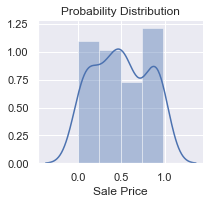

In [450]:
df = pd.DataFrame(np.random.random((100)))
dfm = df.melt(var_name='ds_sale')
g = sns.FacetGrid(dfm, col='ds_sale')
g = (g.map(sns.distplot, 'value'))
plt.title('Probability Distribution')
plt.xlabel('Sale Price')

**Conclusion**

Terlihat pada grafik diatas bahwasannya wilayah Staten Island **Berdistribusi Normal**

**8 . Confidence Interval**

In [452]:
ds_daerah = ds['BOROUGH'].value_counts()
ds_daerah

Queens           26736
Brooklyn         24047
Manhattan        18306
Staten Island     8410
Bronx             7049
Name: BOROUGH, dtype: int64

In [451]:
# Menghitung CI dari Office Buildings dari Building Class Category
daerah = ds[ds['BOROUGH'] =='Broonx']

In [454]:
p_daerah = 7049/84548
p_daerah

0.08337275866963145

In [455]:
n = 84548

In [457]:
se_daerah = np.sqrt(p_daerah * (1-p_daerah) / n)
se_daerah

0.0009507291207628267

In [458]:
z_score = 1.96

lcb = p_daerah - z_score * se_daerah #lower limit dari CI
ucb = p_daerah + z_score * se_daerah #upper limit dari CI

lcb,ucb

(0.08150932959293632, 0.08523618774632659)

atau menggunakan library statsmodel

In [459]:
import statsmodels.api as sm
sm.stats.proportion_confint(n * p_daerah, n)

(0.08150936383388288, 0.08523615350538002)

**Conclusion**

Dapat disimpulkan bahwa hasil Confidence Interval adalah 0.08150932959293632 dan 0.08523618774632659

**9 . Hypothesis Testing**

In [465]:
# membuat dua variable baru untuk dilakukan hypothesis testing
df_a = ds[ds['BOROUGH'] == 'Manhattan']
df_b = ds[ds['BOROUGH'] == 'Bronx']

In [462]:
total1 = len(df_a)
mu1 = df_a['SALE PRICE'].mean()
std1 = df_a['SALE PRICE'].std()

(total1, mu, std)

(18306, 2744793.4228668194, 21432246.345301684)

In [463]:
total2 = len(df_b)
mu2 = df_b['SALE PRICE'].mean()
std2 = df_b['SALE PRICE'].std()

(total2, mu, std)

(7049, 2744793.4228668194, 21432246.345301684)

In [466]:
# hypothesis testing
from statsmodels.stats.weightstats import ztest
ztest, pval= ztest(df_b['SALE PRICE'],df_a['SALE PRICE'])
print("pval: ",float(pval))

if pval > 0.05:
    print("H0 Diterima")
else:
    print("H1 Ditolak")

pval:  3.995712308006212e-17
H1 Ditolak


**Coclusion**

Dapat disimpulkan bahwa terdapat perbedaan rata - rata harga antara Manhattan dengan Bronx